## Задание

Добейтесь на автокодировщике с 2-мерным скрытым пространством на 3-х цифрах: 0, 1 и 3 – ошибки MSE **<0.034** на скорости обучения **0.001** на **10-й эпохе**.

## Импорт библиотек


In [1]:
# Операции с путями
import glob

# Работа с операционной системой
import os

# Отрисовка графиков
import matplotlib.pyplot as plt

# Работа с массивами данных
import numpy as np

# Модель
from tensorflow.keras import Model

# Коллбэки для выдачи информации в процессе обучения
from tensorflow.keras.callbacks import LambdaCallback

# Датасет
from tensorflow.keras.datasets import mnist

# Слои
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape

# Оптимизатор для обучения модели
from tensorflow.keras.optimizers import Adam

%matplotlib inline

## Утилиты

Функция-коллбэк. Отрисовывает объекты в скрытом пространстве

In [2]:
def ae_on_epoch_end(epoch, logs):
    print('________________________')
    print(f'*** ЭПОХА: {epoch+1}, loss: {logs["loss"]} ***')
    print('________________________')

    # Получение картинки латентного пространства в конце эпохи и запись в файл
    # Задание числа пикселей на дюйм
    plt.figure(dpi=100)

    # Предсказание енкодера на тренировочной выборке
    predict = encoder.predict(X_train)

    # Создание рисунка: множество точек на плоскости 3-х цветов (3-х классов)
    scatter = plt.scatter(predict[:,0,],predict[:,1], c=y_train, alpha=0.6, s=5)

    # Создание легенды
    legend2 = plt.legend(*scatter.legend_elements(), loc='upper right', title='Классы')

    # Сохранение картинки с названием, которого еще нет
    paths = glob.glob('*.jpg')
    plt.savefig(f'image_{str(len(paths))}.jpg')

    # Отображение. Без него рисунок не отрисуется
    plt.show()


ae_callback = LambdaCallback(on_epoch_end=ae_on_epoch_end)

Удаление изображений. Применять при обучении новой модели, чтобы не было путаницы в картинках.

In [3]:
def clean():
  # Получение названий всех картинок
  paths = glob.glob('*.jpg')

  # Удаление всех картинок по полученным путям
  for p in paths:
    os.remove(p)

# Удаление всех картинок
clean()

## Загрузка данных

In [4]:
# Загрузка датасета
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Нормировка
X_train = X_train.astype('float32')/255.
X_train = X_train.reshape(-1, 28, 28, 1)

In [6]:
# Выбор визуализируемых классов (цифр) и формирование подвыборок для них по маске
numbers = [0, 1, 3]
mask = np.array([(i in numbers) for i in y_train])
X_train = X_train[mask]
y_train = y_train[mask]

## Создание модели и обучение

In [ ]:
# Ваше решение
def create_dense_ae(in_shape, latent_dim):
    input_img = Input(in_shape)  # Входной слой с заданной формой

    flat_img = Flatten()(
        input_img
    )  # Преобразование входного изображения в одномерный вектор
    # Полносвязные слои для кодирования изображения
    x = Dense(256, activation="relu")(flat_img)
    x = Dense(128, activation="relu")(x)
    # Кодирование изображения в латентное пространство
    encoded = Dense(latent_dim, activation="relu")(x)
    # Входной слой для декодирования
    input_encoded = Input(shape=(latent_dim,))
    # Полносвязные слои для декодирования латентного вектора
    x = Dense(256, activation="relu")(input_encoded)
    x = Dense(128, activation="relu")(x)
    flat_decoded = Dense(in_shape[0] * in_shape[1], activation="sigmoid")(x)

    # Преобразование обратно в двумерное изображение
    decoded = Reshape(in_shape)(flat_decoded)

    encoder = Model(input_img, encoded, name="encoder")  # Создание модели энкодера
    decoder = Model(input_encoded, decoded, name="decoder")  # Создание модели декодера
    # Создание полной модели автоэнкодера
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    
    # Возвращение энкодера, декодера и автоэнкодера
    return encoder, decoder, autoencoder


In [ ]:
encoder, decoder, autoencoder = create_dense_ae(
    in_shape=X_train.shape[1:3], latent_dim=2
)  # Создание модели автоэнкодера

# Компиляция модели автоэнкодера с оптимизатором Adam и функцией потерь MSE
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")


________________________
*** ЭПОХА: 1, loss: 0.09927522391080856 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


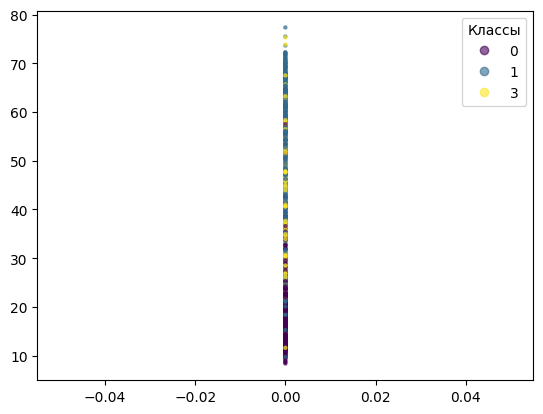

________________________
*** ЭПОХА: 2, loss: 0.061164870858192444 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


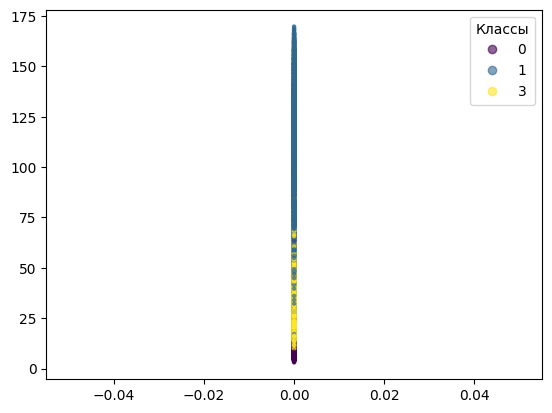

________________________
*** ЭПОХА: 3, loss: 0.05742442607879639 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


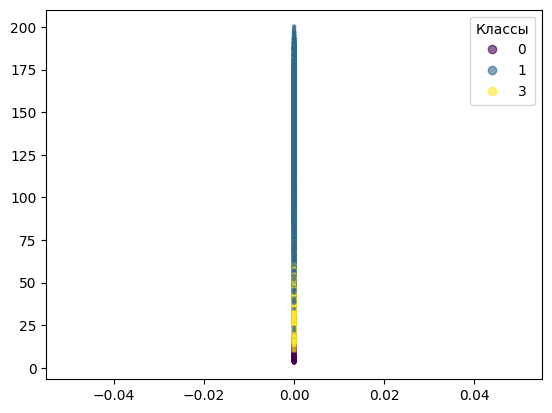

________________________
*** ЭПОХА: 4, loss: 0.05551674962043762 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


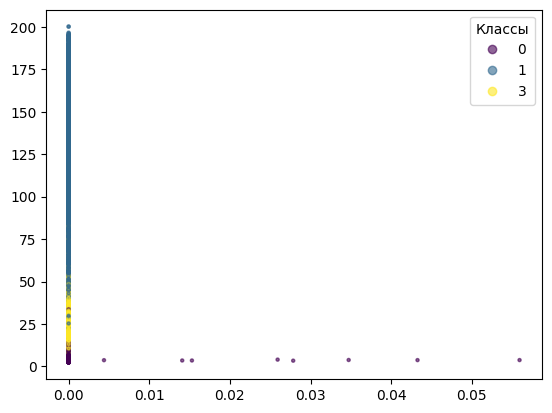

________________________
*** ЭПОХА: 5, loss: 0.05131976306438446 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


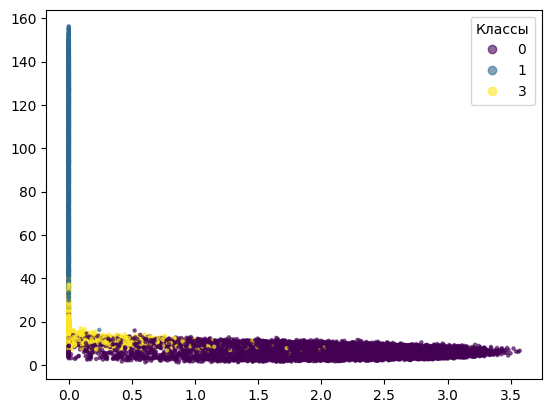

________________________
*** ЭПОХА: 6, loss: 0.046837542206048965 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


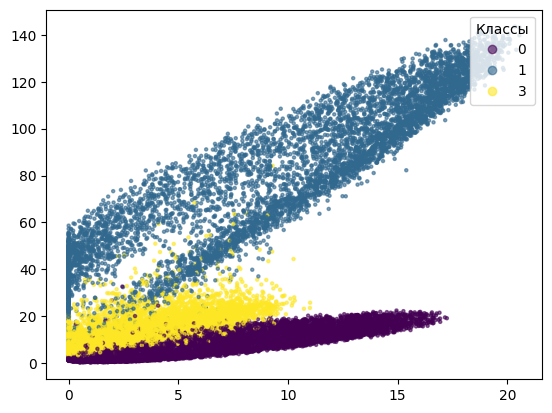

________________________
*** ЭПОХА: 7, loss: 0.03975873440504074 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


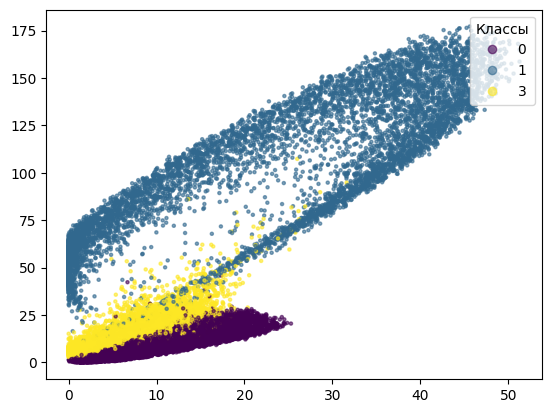

________________________
*** ЭПОХА: 8, loss: 0.03578605130314827 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


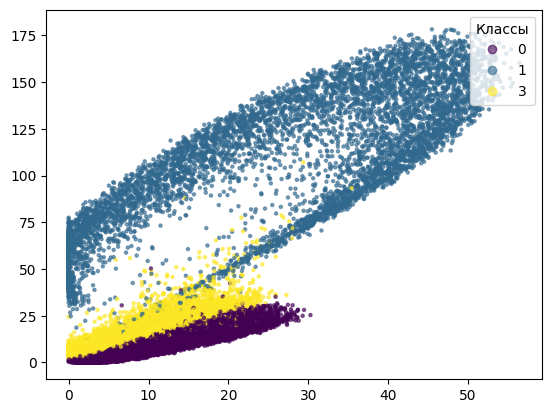

________________________
*** ЭПОХА: 9, loss: 0.034305162727832794 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


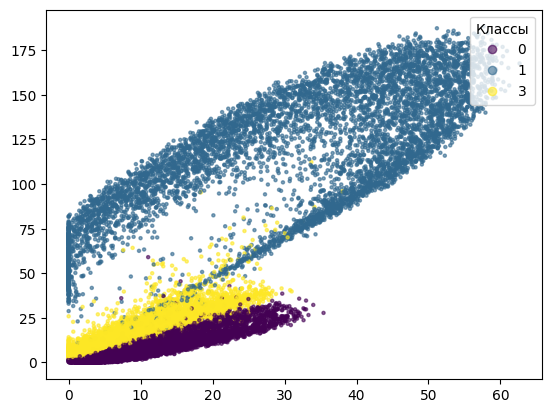

________________________
*** ЭПОХА: 10, loss: 0.033253517001867294 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


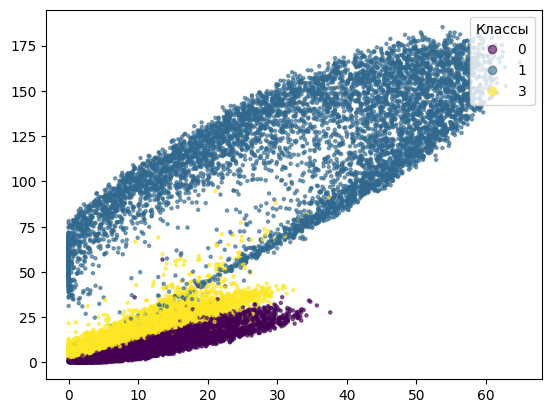


Финальная ошибка MSE на 10-й эпохе: 0.03325


In [ ]:
epochs = 10
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=epochs,
    batch_size=256,
    shuffle=True,
    callbacks=[ae_callback],
    verbose=0,
)  # Обучение модели автоэнкодера

# Вывод финальной ошибки MSE на 10-й эпохе
final_loss = history.history["loss"][-1]
print(f"\nФинальная ошибка MSE на 10-й эпохе: {final_loss:.5f}")